In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings(action="ignore")

In [3]:
sales = pd.read_csv('data/Video_Games_Sales_as_at_22_Dec_2016.csv', encoding_errors='ignore')
sales.sample(5)

,Name,Platform,Year_of_Release,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count,Developer,Rating
12666,Killing Zone,PS,1996.0,Fighting,Acclaim Entertainment,0.03,0.02,0.00,0.00,0.06,NaN,NaN,NaN,NaN,NaN,NaN
9249,Paws & Claws: Pet Vet 2,DS,2007.0,Simulation,THQ,0.13,0.00,0.00,0.01,0.14,NaN,NaN,NaN,NaN,NaN,NaN
16177,Psycho-Pass,XOne,2014.0,Adventure,5pb,0.00,0.00,0.01,0.00,0.01,NaN,NaN,NaN,NaN,NaN,NaN
3832,NBA Live 08,X360,2007.0,Sports,Electronic Arts,0.47,0.00,0.00,0.04,0.52,73.0,37.0,5.3,19.0,EA Canada,E
6013,Harvest Moon: Magical Melody,Wii,2008.0,Simulation,Rising Star Games,0.23,0.03,0.00,0.02,0.29,69.0,14.0,8.8,17.0,Marvelous Entertainment,E


In [5]:
sales.info()
sales.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16719 entries, 0 to 16718
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16717 non-null  object 
 1   Platform         16719 non-null  object 
 2   Year_of_Release  16450 non-null  float64
 3   Genre            16717 non-null  object 
 4   Publisher        16665 non-null  object 
 5   NA_Sales         16719 non-null  float64
 6   EU_Sales         16719 non-null  float64
 7   JP_Sales         16719 non-null  float64
 8   Other_Sales      16719 non-null  float64
 9   Global_Sales     16719 non-null  float64
 10  Critic_Score     8137 non-null   float64
 11  Critic_Count     8137 non-null   float64
 12  User_Score       7590 non-null   float64
 13  User_Count       7590 non-null   float64
 14  Developer        10096 non-null  object 
 15  Rating           9950 non-null   object 
dtypes: float64(10), object(6)
memory usage: 2.0+ MB


(16719, 16)

In [6]:
sales.describe()

,Year_of_Release,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,Critic_Score,Critic_Count,User_Score,User_Count
count,16450.000000,16719.000000,16719.000000,16719.000000,16719.000000,16719.000000,8137.000000,8137.000000,7590.000000,7590.000000
mean,2006.487356,0.263330,0.145025,0.077602,0.047332,0.533543,68.967679,26.360821,7.125046,162.229908
std,5.878995,0.813514,0.503283,0.308818,0.186710,1.547935,13.938165,18.980495,1.500006,561.282326
min,1980.000000,0.000000,0.000000,0.000000,0.000000,0.010000,13.000000,3.000000,0.000000,4.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,0.060000,60.000000,12.000000,6.400000,10.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,0.170000,71.000000,21.000000,7.500000,24.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,0.470000,79.000000,36.000000,8.200000,81.000000
max,2020.000000,41.360000,28.960000,10.220000,10.570000,82.530000,98.000000,113.000000,9.700000,10665.000000


Year_of_Release
1980.0     11.38
1981.0     35.77
1982.0     28.86
1983.0     16.79
1984.0     50.36
1985.0     53.94
1986.0     37.07
1987.0     21.74
1988.0     47.22
1989.0     73.45
1990.0     49.39
1991.0     32.23
1992.0     76.17
1993.0     48.40
1994.0     79.18
1995.0     88.11
1996.0    199.15
1997.0    200.98
1998.0    256.45
1999.0    251.25
2000.0    201.58
2001.0    331.47
2002.0    395.51
2003.0    357.80
2004.0    419.05
2005.0    458.31
2006.0    518.22
2007.0    605.37
2008.0    671.79
2009.0    658.88
2010.0    590.59
2011.0    507.79
2012.0    355.84
2013.0    361.24
2014.0    331.51
2015.0    268.05
2016.0    130.10
2017.0      0.06
2020.0      0.29
Name: Global_Sales, dtype: float64


<AxesSubplot:xlabel='Year_of_Release', ylabel='Global_Sales'>

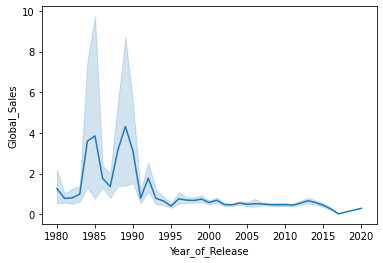

In [22]:
# lets see the sales sdeveloping on timeline
print(sales.groupby('Year_of_Release')['Global_Sales'].sum())
sns.lineplot(x='Year_of_Release', y='Global_Sales',data=sales)

# Can discover that sales global sales of videogames has a tendency to decrease. Boom of sales for the platforms and games available in the dataset was in 80s, especially the second 5-years after some sales squat.

[[Text(0, 0, 'North America'),
  Text(1, 0, 'Europe'),
  Text(2, 0, 'Japan'),
  Text(3, 0, 'Other')]]

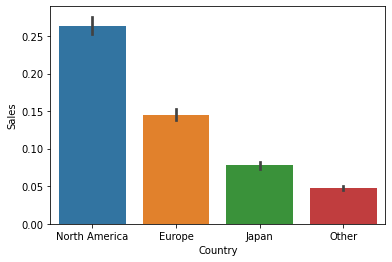

In [37]:
#lets compare how the sales are split by country
country_sales = pd.melt(sales, var_name='Country', value_vars=['NA_Sales',	'EU_Sales',	'JP_Sales',	'Other_Sales'], value_name='Sales')
g = sns.barplot(x='Country', y='Sales', data=country_sales)
g.set(xticklabels=['North America', 'Europe', 'Japan', 'Other'])



# So we can see that America and EU are drastic leaders in video games sales all over the years.